<a href="https://colab.research.google.com/github/vgls21/Data-Analysis-Portofolio/blob/main/Portofolio_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import των απαραίτητων βιβλιοθηκών 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Φόρτωση των απαραίτητων δεδομένων

In [ ]:
my_data = pd.read_csv('Train.csv')

In [ ]:
my_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Categorical values έχουν οι στήλες:


*   Item_Identifier
*   Item_Fat_Content
*   Item_Type
*   Outlet_Identifier
*   Outlet_Size
*   Outlet_Location_Type
*   Outlet_Type







Έλεγχος των διαστάσεων των δεδομένων και των περιεχόμενων

In [ ]:
my_data.shape

(8523, 12)

In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Υπάρχουν 8523 γραμμές και δύο στήλες (Item_Weight, Outlet_Size) έχουν αρκετές null τιμές.

Τα null στοιχεία της στήλης Item_Weight θα αντικατασταθούν με την μέση τιμή των υπόλοιπων στοιχείων της στήλης, γιατί αφορά το βάρος που είναι μία συνεχής τιμή

In [ ]:
my_data['Item_Weight'].fillna(my_data['Item_Weight'].mean(), inplace = True)

Τα null στοιχεία της στήλης Outlet_Size θα αντικατασταθούν με την συχνά εμφανιζόμενη τιμή των υπόλοιπων στοιχείων της στήλης σε σύγκριση με την τιμή που έχει το Outlet_Type, γιατί περιέχει μη συνεχής δεδομένων

In [ ]:
outlet_size_mode = my_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc = (lambda x: x.mode()[0]))
my_data.loc[my_data['Outlet_Size'].isnull(), 'Outlet_Size'] = my_data.loc[my_data['Outlet_Size'].isnull(), 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

Έλεγχος για το αν υπάρχουν null τιμές

In [ ]:
my_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Αφού δεν υπάρχει καμία null τιμή, ακολουθεί οπτικοποίηση κάθε στήλης

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


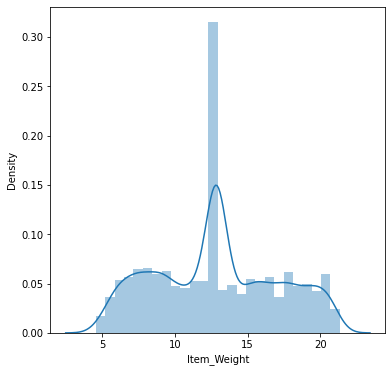

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(my_data['Item_Weight'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


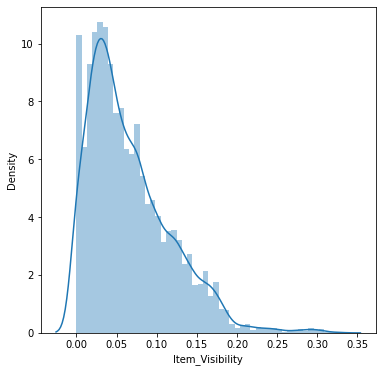

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(my_data['Item_Visibility'])
plt.show()

Το Item_Visibility δεν γίνεται να είναι 0, οπότε τα 0 θα αντικατασταθούν με το μέσο όρο της στήλης

In [ ]:
my_data['Item_Visibility'].fillna(my_data['Item_Visibility'].mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


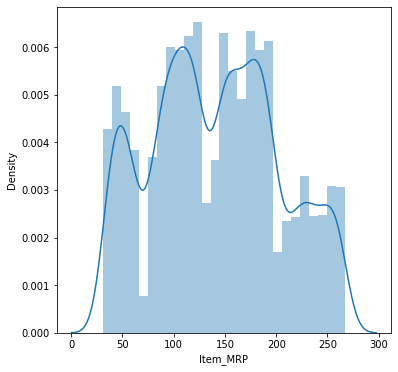

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(my_data['Item_MRP'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


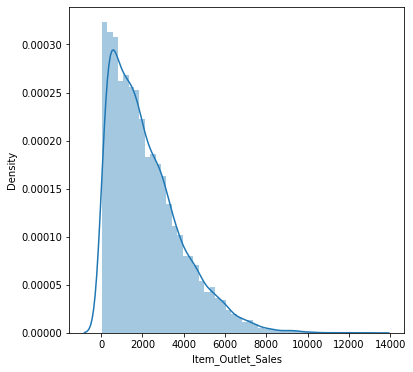

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(my_data['Item_Outlet_Sales'])
plt.show()

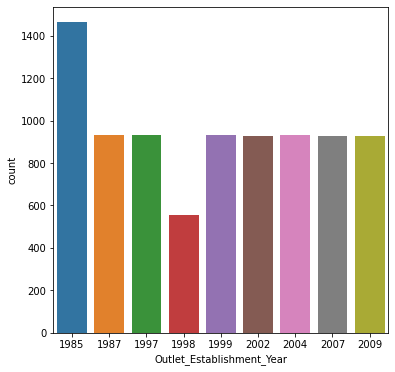

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=my_data)
plt.show()

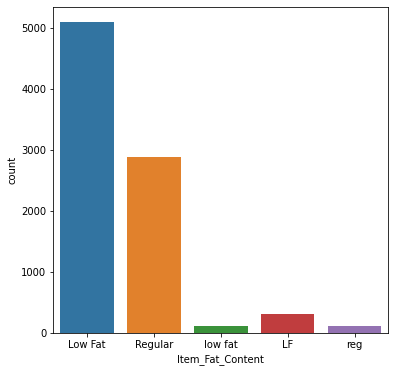

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=my_data)
plt.show()

Το παραπάνω διάγραμμα έχει 2 ή 3 labels για την ίδια κατηγορία, οπότε πρέπει να γίνει διόρθωση

In [ ]:
my_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

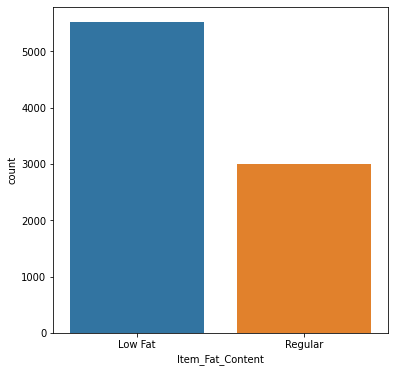

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=my_data)
plt.show()

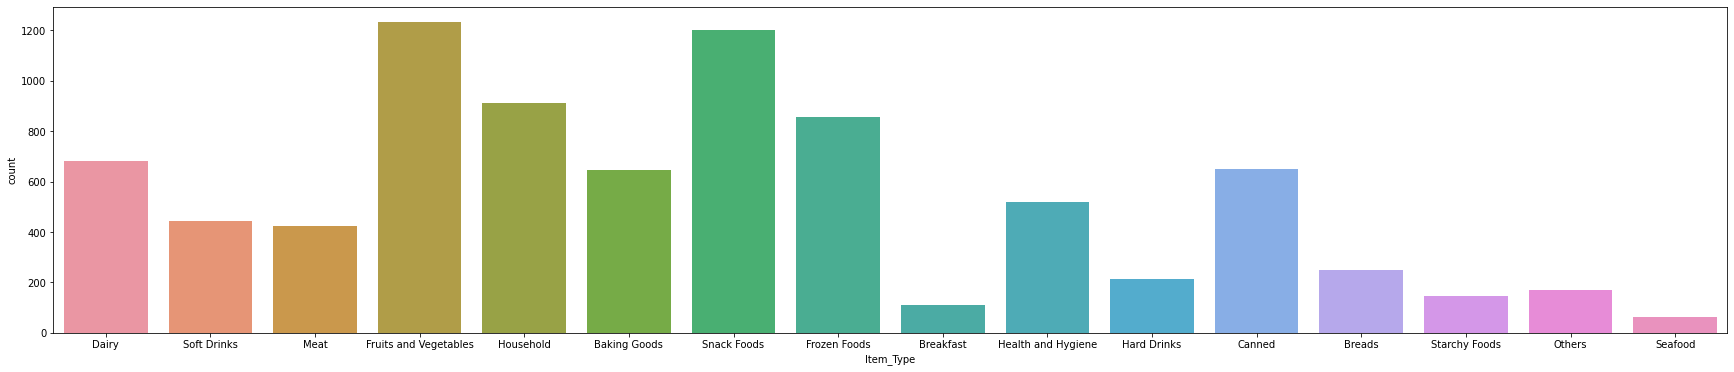

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=my_data)
plt.show()

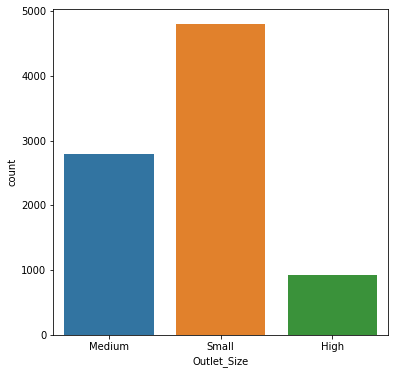

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=my_data)
plt.show()

Δημιουργία correlation matrix για την εμφάνιση της συσχέτισης των στηλών

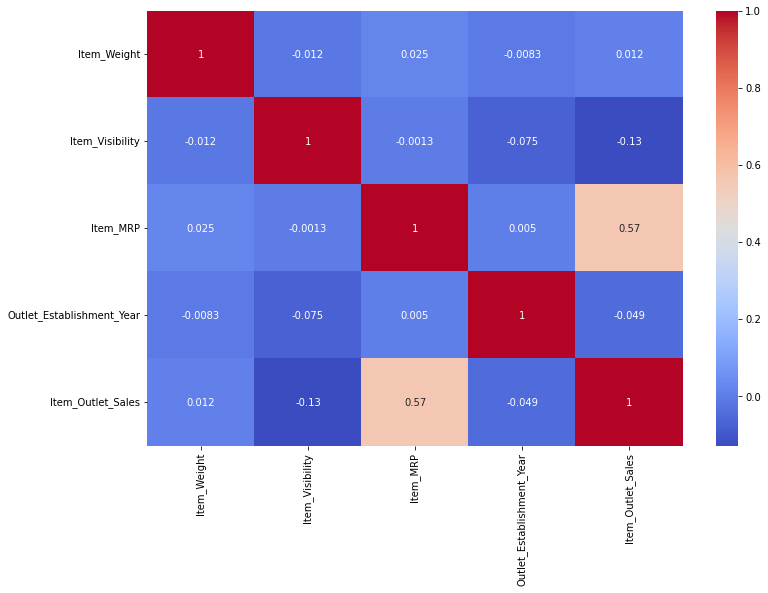

In [ ]:
corr = my_data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

Η μεγαλύτερη συσχέτιση της στήλης Item_Outlet_Sales υπάρχει με τη στήλη Item_MRP και η δεύτερη μεγαλύτερη με τη στήλη Outlet_Type

Encoding για τις στήλες

In [ ]:
encoder = LabelEncoder()

my_data['Item_Identifier'] = encoder.fit_transform(my_data['Item_Identifier'])

my_data['Item_Weight'] = encoder.fit_transform(my_data['Item_Weight'])

my_data['Item_Fat_Content'] = encoder.fit_transform(my_data['Item_Fat_Content'])

my_data['Item_Visibility'] = encoder.fit_transform(my_data['Item_Visibility'])

my_data['Item_Type'] = encoder.fit_transform(my_data['Item_Type'])

my_data['Item_MRP'] = encoder.fit_transform(my_data['Item_MRP'])

my_data['Outlet_Identifier'] = encoder.fit_transform(my_data['Outlet_Identifier'])

my_data['Outlet_Establishment_Year'] = encoder.fit_transform(my_data['Outlet_Establishment_Year'])

my_data['Outlet_Size'] = encoder.fit_transform(my_data['Outlet_Size'])

my_data['Outlet_Location_Type'] = encoder.fit_transform(my_data['Outlet_Location_Type'])

my_data['Outlet_Type'] = encoder.fit_transform(my_data['Outlet_Type'])

my_data['Item_Outlet_Sales'] = encoder.fit_transform(my_data['Item_Outlet_Sales'])

Προετοιμασία των δεδομένων για το μοντέλο

In [ ]:
X = my_data.drop(columns=['Item_Identifier', 'Item_Visibility', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Identifier' ,'Item_Outlet_Sales'])
y = my_data['Item_Outlet_Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Δημιουργία Random Forest μοντέλου

In [ ]:
rf_model = RandomForestRegressor(n_estimators=20, random_state=42)

In [ ]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [ ]:
rf_pred = rf_model.predict(X_test)

Έλεγχος του μοντέλου

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

Mean Absolute Error: 438.140663863903
Mean Squared Error: 335909.7647736554
Root Mean Squared Error: 579.5772293436444


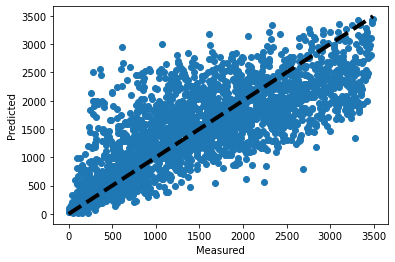

In [ ]:
ig, ax = plt.subplots()
ax.scatter(y_test, rf_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()